Minimum distance:  0.008011340954477995
Min acheived:  [16, 13, 16, 13, 13, 13, 6, 16, 13, 6, 13, 16, 6, 17, 16, 4, 13, 13, 13, 1, 13, 12, 13, 13, 13, 13, 13, 13, 16, 13, 13, 12, 13, 13, 12, 16, 13, 13, 13, 13, 13, 13, 17, 13, 16, 13, 13, 13, 1, 13, 13, 13, 13, 13, 13, 12, 6, 13, 6, 16, 13, 13, 13, 13, 1, 12, 13, 13, 16, 13, 13, 6, 1, 13, 13, 13, 6, 16, 6, 12, 13, 13, 13, 13, 13, 13, 13, 16, 13, 13, 13, 1, 13, 13, 13, 13, 16, 13, 1, 1]
Point:  [1.50750214e-03 6.87478613e-02 3.91587774e-05 2.03040696e-05
 8.87455559e-03 7.13143107e-05 7.82031013e-02 1.28594810e-03
 1.14085166e-03 1.94929751e-03 7.87245859e-04 2.51850540e-04
 5.73617974e-02 6.33539854e-01 3.45203331e-04 1.99413206e-03
 1.28310589e-01 1.53193804e-02 2.36913757e-05 2.26360656e-04]


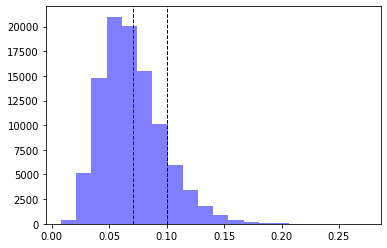

'\nPlotting samples from simplex with n = 2\n'

In [199]:
"""
Mirroring the proof of Approx. Caratheodory in the case of a simplex
Arian Nadjimzadah
"""
import matplotlib.pyplot as plt
import numpy as np
import random as rand
import math

"""
Sample a point from convex hull of e1 = (0,...,0,1), ... , en = (1,0,...,0),
which is the set \{(x_1, \ldots ,x_{n-1}, 1 - (x_1 + \cdots + x_{n-1})\}
"""
def sample_from_simplex(n):
    pt = np.zeros(n); # Initialize a numpy array
    perm = np.random.permutation(n) # Permute the numbers 0,...,n-1
    accum = 1.0;
    for i in perm[:-1]:
        # sample from viable range
        pt[i] = np.random.uniform(0,accum)
        accum = accum - pt[i]
    pt[perm[n-1]] = accum
    return pt

"""
Sample k random vectors according to prob (probability of e1,...,en)
"""
n = 20
k = 100
# Sample random vectors based on convex combination
x = sample_from_simplex(n)
   
    
def cost(state, x):
    pt_sum = np.zeros(n)
    for p in state:
        pt_sum[p] += 1
    distance = np.sqrt(np.sum((x - pt_sum/k)**2))
    return distance    
    
"""
Determine the closeness of fit over multiple trials
"""
def sample_vectors(numTrials, distribution):
    numTrials = 100000
    trialFit = []
    trial = []
    # Get the distance between average of the k random vectors and x
    for i in range(numTrials):
        # sample vectors based on distribution
        # Integer represents position of '1' in random vector
        points = rand.choices([i for i in range(n)], weights = distribution, k = k)
        # find the distance from the average of points to x
        pt_sum = np.zeros(n)
        for p in points:
            pt_sum[p] += 1
        distance = np.sqrt(np.sum((x - pt_sum/k)**2))
        trialFit.append(distance)
        trial.append(points)
    return trialFit, trial
    
# trialFit_rand, trial = sample_vectors(10000, [1]*n)
trialFit_carth, trial = sample_vectors(10000, x)
trialFit = trialFit_carth
# Print minimum of distances
print('Minimum distance: ', min(trialFit))
best = min(trial, key = lambda state: cost(state, x))
print("Min acheived: ", best)
print('Point: ', x)

"""
Plot a histogram of trialFit data
""" 
num_bins = 20
plt.hist(trialFit, num_bins, facecolor='blue', alpha=0.5)
plt.axvline(1/math.sqrt(k), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(trialFit), color='b', linestyle='dashed', linewidth=1)
plt.show()



"""
Plotting samples from simplex with n = 2
"""
# A = [sample_from_simplex(2) for i in range(1000)]
# plt.figure(figsize = (8,8))
# plt.axis('equal')
# plt.plot([a[0] for a in A], [a[1] for a in A], 'or')
# plt.show()
        
    
    

Best of search:  0.039582041322608945
Best:  [75 75 75 75 75 75 75 75 75 99 75 75 75 75 75 75 75 78 75 75]


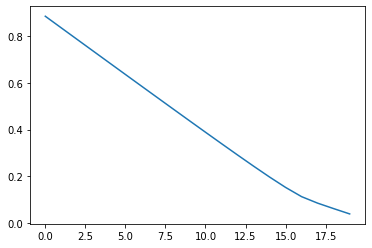

In [191]:
"""
Running local search
"""
#n = 10;
#k = 20;
#x = sample_from_simplex(n)
# A state is represented by an array of integers, each of which represents the position of 1

def cost(state, x):
    pt_sum = np.zeros(n)
    for p in state:
        pt_sum[p] += 1
    distance = np.sqrt(np.sum((x - pt_sum/k)**2))
    return distance

def getSuccessors(state):
    successors = [];
    for i in range(k):
        for j in range(n):
            succ = state.copy() 
            succ[i] = j
            successors.append(succ);
    return successors;

def hillclimbing():
    trialFit = [];
    # Sample an initial state (uniformly now but could be improved)
    current = np.array([rand.randint(0,n-1) for i in range(k)]);
    # begin the descent!
    while(True):
        # find the minimum cost neighbor
        neighbor = min(getSuccessors(current), key = lambda state: cost(state, x));
        
        # end if we reach a local min
        neighbor_cost = cost(neighbor,x);
        if (neighbor_cost >= cost(current, x)):
            return current, cost(current, x), trialFit;
    
        trialFit.append(neighbor_cost);
        current = neighbor;

state, finalCost, fit = hillclimbing();
print("Best of search: ", finalCost)
print("Best: ", state)
# plot the figure
plt.figure();
plt.plot(fit)
plt.show();

In [192]:
A = state.sort()
B = best.sort()
print(A == B)

True
